In [ ]:
import requests
import yaml
from bs4 import BeautifulSoup
import json
from concurrent.futures import ThreadPoolExecutor

with open('./config/config.yml', 'r') as f:
    config = yaml.safe_load(f)
    
def getData(urlchotot):
    response = requests.get(url=urlchotot)
    soup = BeautifulSoup(response.text, 'html.parser')
    all_results = soup.find_all('div', attrs={'tabindex':"0"})
    for result in all_results:
        data = {}
        data["name"] = result.find('h3',class_="adonovt").text
        data["year"] = result.find('span', class_='c1u6gyxh').text
        data["price"] = result.find('span', class_='bfe6oav').text
        newRequest = requests.get("https://xe.chotot.com"+result.find('a',attrs={'itemprop':'item'}).get('href'))
        newSoup = BeautifulSoup(newRequest.text, 'html.parser')
        data["description"] = newSoup.find('p', attrs={'itemprop':'description'}).text
        data["urlcar"] = "https://xe.chotot.com"+result.find('a',attrs={'itemprop':'item'}).get('href')
        print(json.dumps(data, ensure_ascii=False, indent=2))

def main():
    urlchotot = config['url']['urlchotot']
    listUrl = [urlchotot.format(i) for i in range(1, 1000)]

    with ThreadPoolExecutor(max_workers=10) as executor:
        executor.map(getData, listUrl)

if __name__ == '__main__':
    main()


In [ ]:
from Utils.postgres_tool import PostgresTool
import yaml
with open('./config/config.yml', 'r') as f:
    config = yaml.safe_load(f)

db_params = config['database']
# import psycopg2
# try:
#     connection = psycopg2.connect(**db_params)
#     cursor = connection.cursor()
    
#     # Execute a simple query
#     cursor.execute("SELECT version();")
#     record = cursor.fetchone()
#     print("You are connected to - ", record, "\n")
    
#     # Close the cursor and connection
#     cursor.close()
#     connection.close()
# except Exception as error:
#     print("Error while connecting to PostgreSQL", error)
conn = PostgresTool(**db_params)
conn.get_all_table()

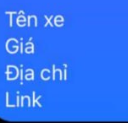

In [1]:
import requests
import yaml
from bs4 import BeautifulSoup
import json
import time

with open('./config/config.yml', 'r') as f:
    config = yaml.safe_load(f)
    
def getData(urlchotot):
    response = requests.get(url=urlchotot)
    soup = BeautifulSoup(response.text, 'html.parser')
    all_results = soup.find_all('div', attrs={'tabindex':"0"})
    for result in all_results:
        newRequest = requests.get("https://xe.chotot.com"+result.find('a',attrs={'itemprop':'item'}).get('href'))
        newSoup = BeautifulSoup(newRequest.text, 'html.parser')
        data = {}
        data["name"] = newSoup.find('h1').text
        data["price"] = newSoup.find('b', class_='p26z2wb').text
        data["address"] = newSoup.find('span', class_ = "bwq0cbs flex-1").text
        data["urlcar"] = "https://xe.chotot.com"+result.find('a',attrs={'itemprop':'item'}).get('href')
        print(data)

def main():

    urlchotot = config['url']['urlchotot']
    listUrl = [urlchotot.format(i) for i in range(1, 10)]
    for url in listUrl: 
        getData(url)

if __name__ == '__main__':
    while True:
        main()
        time.sleep(30*60) # 30 p


{'name': 'Hyundai Elantra 2019 1.6AT - 70000 km', 'price': '525.000.000 đ', 'address': 'Phường Việt Hưng, Quận Long Biên, Hà Nội', 'urlcar': 'https://xe.chotot.com/mua-ban-oto-quan-long-bien-ha-noi/118458483.htm#px=SR-stickyad-[PO-1][PL-top]'}
{'name': 'Ford Transit 2014 Luxury -', 'price': '382.000.000 đ', 'address': 'Phường Võ Cường, Thành phố Bắc Ninh, Bắc Ninh', 'urlcar': 'https://xe.chotot.com/mua-ban-oto-thanh-pho-bac-ninh-bac-ninh/118170367.htm#px=SR-stickyad-[PO-2][PL-top]'}
{'name': '𝐂𝐈𝐕𝐈𝐂 𝐑𝐒 𝐂𝐔𝐎̂́𝐈 𝟐𝟎𝟐𝟎 𝐒𝐈𝐄̂𝐔 𝐋𝐔̛𝐎̛́𝐓- 𝐍𝐇𝐀̣̂𝐏 𝐓𝐇𝐀́𝐈', 'price': '680.000.000 đ', 'address': 'Phường 12, Quận 10, Tp Hồ Chí Minh', 'urlcar': 'https://xe.chotot.com/mua-ban-oto-quan-10-tp-ho-chi-minh/118284022.htm#px=SR-stickyad-[PO-3][PL-top]'}
{'name': 'Bán xe Peugeot 2008 GT Line 2022', 'price': '675.000.000 đ', 'address': 'Phường An Phú, Thành phố Thuận An, Bình Dương', 'urlcar': 'https://xe.chotot.com/mua-ban-oto-thanh-pho-thuan-an-binh-duong/117254520.htm#px=SR-stickyad-[PO-4][PL-top]'}
{'name': '